# Pymaceuticals Inc.
---

### Analysis

There was a duplicate mouse. The total numer of mice after removing duplicates is 248.  
Table 1. Capomulin and Ramicane show the smallest tumor volume (Mean = 40-41 mm3) whereas Ketapril the largest (55 mm3)
Bar Graph. Capomulin and Ramicane have the maximum mice number, and Propriva has the smallest mice number.
The total count of mice by gender is highly balanced 51% female and 49% male.
Boxplot. From the selected treatments Capomulin and Ramicane reduces the size of tumors better.
Capomulin graph mouse I509. The treatment decreases the tumor levels at timepoint 40 days.

Correlation for Capomulin. The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
mouse_combined.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [3]:
# Checking the number of mice.
nr_mice = mouse_combined["Mouse ID"].nunique()
nr_mice

249

In [4]:
# 249 animals

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mice_ID = mouse_combined.loc[mouse_combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates_mice_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup = mouse_combined.loc[mouse_combined["Mouse ID"] =="g989"]
mouse_dup

# Mouse g989 has two entries for each timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_combined[mouse_combined["Mouse ID"] !="g989"]
mouse_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [35]:
group_by_ID = mouse_clean.groupby(["Mouse ID"])
group_by_ID

In [37]:
# Checking the number of mice in the clean DataFrame.
nr_mice_clean = mouse_clean["Mouse ID"].nunique()
nr_mice_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).mean()
median = mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).median()
var = mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).var()
std = mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).std()
sem = mouse_clean['Tumor Volume (mm3)'].groupby(mouse_clean['Drug Regimen']).sem()


# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [106]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  mouse_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

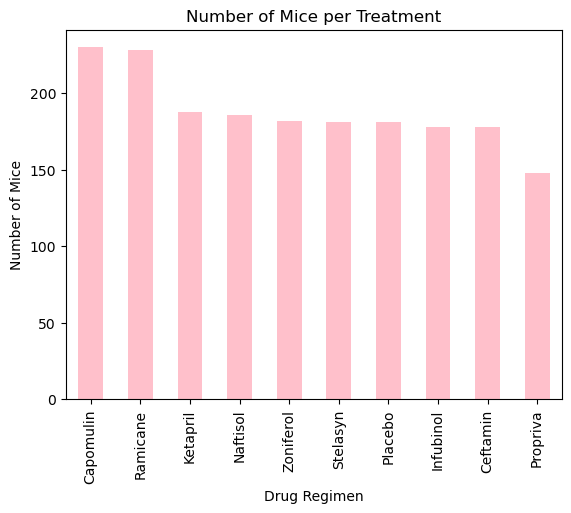

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = mouse_clean["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='pink')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

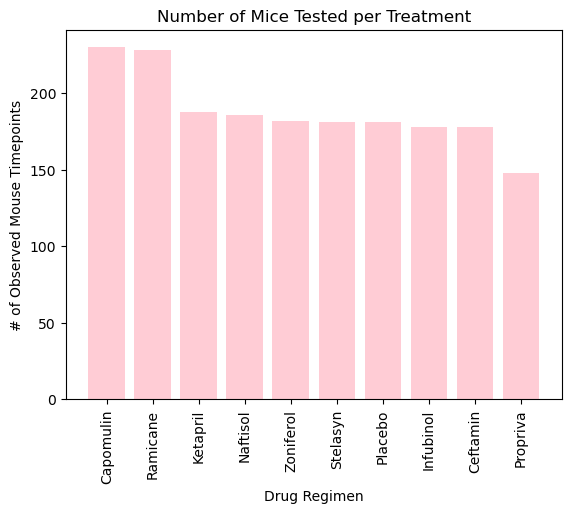

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='pink', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

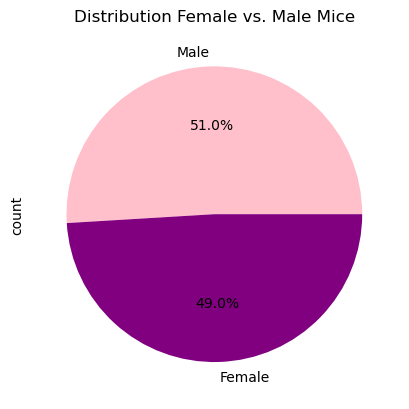

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_mouse = mouse_clean["Sex"].value_counts()
plt.title("Distribution Female vs. Male Mice")
plt.ylabel("Sex")
gender_mouse.plot.pie(autopct= "%1.1f%%", colors=["pink", "purple"])
plt.show()

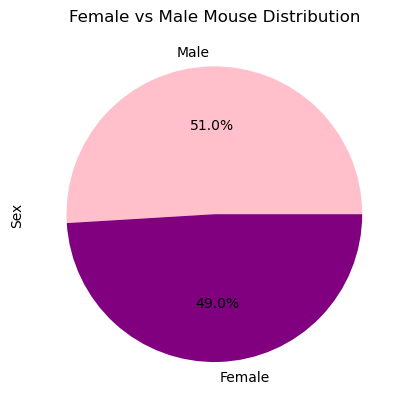

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_mouse.plot.pie(y='Total Count', autopct="%1.1f%%", colors=["pink", "purple"])
plt.title('Female vs Male Mouse Distribution')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Ramicane_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Ramicane"]
Infubinol_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Infubinol"]
Ceftamin_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Ceftamin"]
Capomulin_df = mouse_clean.loc[mouse_clean['Drug Regimen'] == "Capomulin"]

treatments_combined = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
drugs_df = pd.concat(treatments_combined)

greatest_timepoint = group_by_ID["Timepoint"].max()

merged_frames = pd.merge(drugs_df,greatest_timepoint, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
17,j246,Capomulin,35,38.753265
27,r554,Capomulin,45,32.377357
37,s185,Capomulin,45,23.343598
47,b742,Capomulin,45,38.939633
...,...,...,...,...
787,p438,Ceftamin,45,61.433892
793,b487,Ceftamin,25,56.057749
803,o287,Ceftamin,45,59.741901
812,q483,Ceftamin,40,64.192341


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
  
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
     volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
     final_tumor_vol.append(volume)  

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
quartile = volume.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
                                                      
    # Determine outliers using upper and lower bounds
low_bound = lower - (1.5*iqr)
up_bound = upper + (1.5*iqr)

print(f"Values below {low_bound} could be outliers.")
print(f"Values above {up_bound} could be outliers.")




Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


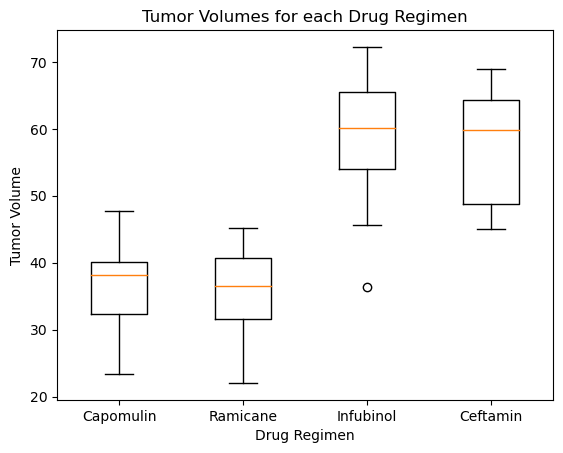

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_vol, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

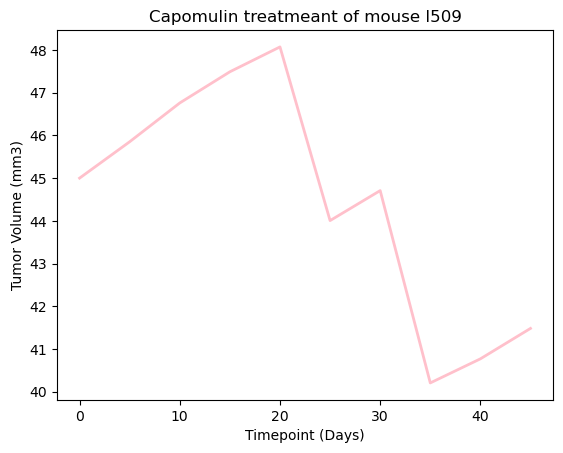

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, color="pink")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

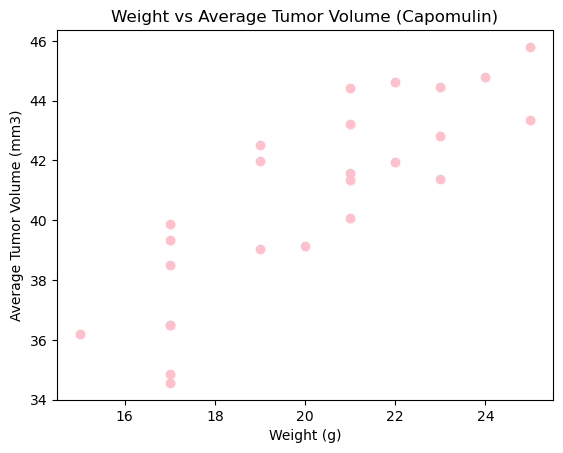

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_treatment = mouse_clean.loc[mouse_clean["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(capomulin_treatment["Weight (g)"],capomulin_treatment["Tumor Volume (mm3)"],color="pink")
plt.title("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84
The r-squared is: 0.709


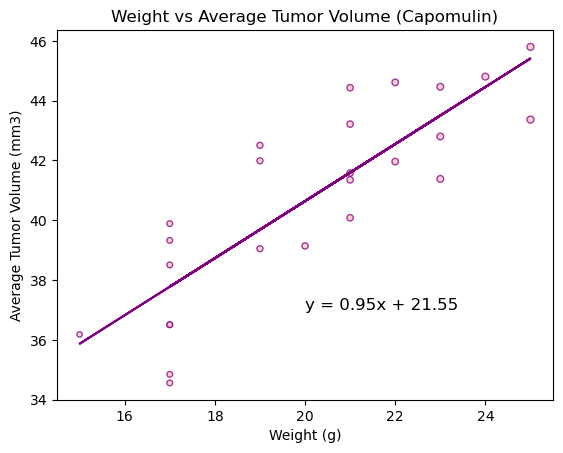

In [104]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#set x and y
x_values = capomulin_treatment["Weight (g)"]
y_values = capomulin_treatment["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values,y_values)

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="pink", edgecolors="purple",
            s=x_values, alpha=0.75)
plt.title("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"purple")
plt.annotate(line_eq,(20,37),fontsize=12,color="black")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(correlation[0],2)}")
print(f"The r-squared is: {round(rvalue**2,3)}")